<a href="https://colab.research.google.com/github/Krankile/ensemble_forecasting/blob/main/notebooks/statistical_models/prediction_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [4]:
%%capture

import os

from functools import partial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm

## Load data

In [23]:
#df_train_meta = pd.read_feather('/content/drive/MyDrive/Master, Ankile og Krange/Data/Meta/m4_meta_am_train.feather').set_index("index")
#df_train_series = pd.read_feather('/content/drive/MyDrive/Master, Ankile og Krange/Data/Series/m4_series_n4_f32_train.feather').set_index("st")

In [24]:
df_val_meta = pd.read_feather('/content/drive/MyDrive/Master, Ankile og Krange/Data/Meta/m4_meta_am_val.feather').set_index("index")
df_val_series = pd.read_feather('/content/drive/MyDrive/Master, Ankile og Krange/Data/Series/m4_series_n4_f32_val.feather').set_index("st")

#Setup

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Implement ordinary least squares 

In [ ]:
from statsmodels.regression.quantile_regression  import QuantReg 
import random
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
def ols_prediction(time_series, meta_dictionary):
    
    forecast_horizon = meta_dictionary["h"]
    end_index = len(time_series)
    
    regressor = sm.add_constant([i for i in range(end_index)])

    model = sm.regression.linear_model.OLS(time_series, regressor).fit()
    
    Xnew = sm.add_constant(list(range(end_index, end_index + forecast_horizon)))

    return model.predict(Xnew)


Perhaps use this for other project

In [ ]:
#h_dict = {"Monthly":18, "Yearly":6, "Quarterly":8, "Weekly":13, "Daily":14, "Hourly":48}    
#end_data_index = regression_series["n"] 
#first_data_index = 4   


#time_dict = {"Monthly":'M', "Yearly":'Y', "Quarterly":'4M', "Weekly":'W', "Daily":'D', "Hourly":'H'}

#Setup

#Setup

In [7]:
!pip install git+https://github.com/jwergieluk/ou_noise.git

  Cloning https://github.com/jwergieluk/ou_noise.git to c:\users\larslank\appdata\local\temp\pip-req-build-nmv_yfz2
  Created wheel for ou-noise: filename=ou_noise-0.9-py3-none-any.whl size=18702 sha256=aadd93f797b82f4ab76ed953267e28b780eb92c9d9b3c63a2ded926464487e82
  Stored in directory: C:\Users\larslank\AppData\Local\Temp\pip-ephem-wheel-cache-4ah_gfet\wheels\93\43\87\e8867a179637a1f55dfa5c52788eba7a082250da291a9b7ffd
Successfully built ou-noise


  Running command git clone -q https://github.com/jwergieluk/ou_noise.git 'C:\Users\larslank\AppData\Local\Temp\pip-req-build-nmv_yfz2'


In [ ]:
from ou_noise import ou
import numpy as np
import matplotlib.pyplot as plt

#Implement Ornstein-Uhlenbeck process

In [ ]:
def ornstein_uhlenbeck_prediction(time_series, meta_dictionary, visualise=False):
    """dX = -A(X-mean)dt+v*dZ"""
    forecast_horizon = meta_dictionary["h"]
    x = np.array(time_series, dtype="float")
    t_historic = np.arange(0, len(x), 1)
    t_horizon = np.arange(0, forecast_horizon, 1)
    
    mean_rev_speed, mean_rev_level, vola = ou.mle(t_historic, x)
    
    adjuster = max(x.max() - x.min(), 1) 

    return ou.path(x[-1], t_horizon, mean_rev_speed, mean_rev_level, vola/adjuster)

#Setup

In [5]:
%%capture
!pip install orbit-ml

In [6]:
import statsmodels.api as sm

import numpy as np
import pandas as pd
from orbit.models.lgt import LGTMAP
from orbit.diagnostics.plot import plot_predicted_data

ModuleNotFoundError: No module named 'orbit'

#Implement Local Global Trend

In [ ]:
def lgt_prediction(time_series, meta_dictionary, visualise=False):

    seasonality = meta_dictionary["s"]
    freq = meta_dictionary["f"]
    forecast_horizon = meta_dictionary["h"]

    time_series_c = pd.DataFrame(time_series).reset_index()
    time_series_c.rename(
        columns={time_series_c.columns[1]: "values"}, inplace=True)
    time_series_c.drop(columns="index", inplace=True)

    times = pd.date_range('1000-10-01', periods=len(time_series_c), freq=freq)
    times_forecast = pd.date_range(
        times[-1], periods=forecast_horizon, freq=freq)

    time_series_c["times"] = times
    time_series_c["values"] = np.array(time_series_c["values"], dtype=float)

    prediction_df = pd.DataFrame([])
    prediction_df["times"] = times_forecast
    prediction_df["values"] = [0]*len(times_forecast)

    date_col = "times"
    response_col = "values"

    lgt = LGTMAP(
        response_col="values",
        date_col="times",
        seasonality=seasonality,
    )

    lgt.fit(df=time_series_c)
    predicted_df = lgt.predict(df=prediction_df)

    if visualise:
        _ = plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df,
                                date_col=date_col, actual_col=response_col,
                                test_actual_df=test_df, title='Prediction with LGTMAP Model')
    return predicted_df["prediction"]


In [ ]:
test = False

if test:
    meta_var  = {'h': 8, 's': 4, 'f': '4M'}
    series_string = """[8700.0 8700.0 8600.0 8600.0 8700.0 8800.0 8800.0 8800.0 8900.0 9000.0 9100.0 9000.0 9200.0 9200.0 9000.0 8900.0 8900.0 8900.0 8800.0 8700.0 8700.0 8600.0 8700.0 8600.0 8500.0 8500.0 8500.0 8400.0 8500.0 8500.0 8600.0 8600.0 8700.0 8600.0 8500.0 8500.0 8500.0 8600.0 8500.0 8600.0 8800.0 9000.0 9000.0 9200.0 9400.0 9100.0 8900.0 8900.0 8900.0 8900.0 9000.0 9000.0 9000.0 9300.0 9500.0 9500.0 9600.0 9600.0]"""
 
    time_series = []
    
    for val in series_string.split(" ")[1:-1]:
        try:
            val = float(val.strip())
            time_series.append(val)
        except:
            continue
    
    predic = lgt_prediction(time_series, meta_var)
    print(predic)



#Implement

In [ ]:
def quant_reg_prediction(time_series, meta_variables, q=.95, visualise=False):
    """Take in meta_variables "h" and q_high_low 1=>q=.99, 0 => q=0.01"""
    
    regressor = sm.add_constant(np.array(range(0,len(time_series))))
    time_series_constant = np.array(time_series, dtype='float')

    reg = QuantReg(time_series_constant, regressor).fit(q=q)
    
    future_t = sm.add_constant(list(range(len(time_series), len(time_series) + meta_variables["h"])))
    
    return reg.predict(future_t)

In [ ]:
test = False
def visualise(actual, prediction):
    plott_ = np.append(np.array([None]*len(actual)).T, prediction)
    plt.plot(actual, "o")
    plt.plot(plott_, "o")
    plt.show()

if test == True:
    a = 3
    st = 110
    b = 20

    test = [i*a + st*2*(random.random()-.5) + b for i in range(20)]

    quant_reg_prediction(test,{"h":10, "q_high_low":1 })

    plt.rcParams["figure.figsize"] = (16,8)


    visualise(test, quant_reg_prediction(test,{"h":10, "q_high_low":1 }))
    visualise(test, quant_reg_prediction(test,{"h":10, "q_high_low":0 }))

#Write model results to file

In [25]:
def all_models_to_file(file_path, data_df, meta_df, save_after_n):
    
    time_dict = {"Monthly":'M', "Yearly":'Y', "Quarterly":'4M', "Weekly":'W', "Daily":'D', "Hourly":'H'}

    data_indices = data_df.index
    file_created = os.path.exists(file_path)
    if file_created:
        exsisting_df = pd.read_feather(file_path)
        data_indices = (set(data_df.index) - set(exsisting_df.index))
    data_left = data_df.loc[data_indices]
    
    column_models = ["ols", "uhlenbeck", "lgt",  "quant_01_reg", "quant_99_reg"]
    columns = []
    for model_name in column_models:
        for i in range(48):
            columns.append(f"{model_name}_{i}")
    
    for batch in tqdm(np.array_split(data_left, save_after_n)):
        batch_predictions = []
        for idx in tqdm(batch.index): 
            n = int(meta_df.loc[idx]["n"])
            freq = time_dict[data_df.loc[idx]["period"]]
            one_time_series = data_df.loc[idx].iloc[4:n].to_numpy().astype(np.float32)
            meta_variables = {"h" : int(meta_df.loc[idx]["h"]), "s": int(meta_df.loc[idx]["seasonal_period"]), "f":freq }
            
            models = [ols_prediction, ornstein_uhlenbeck_prediction, lgt_prediction, partial(quant_reg_prediction, q=0.01), partial(quant_reg_prediction, q=0.99)] #sgt_prediction

            predictions_row = []
            
            #predict and pad
            for model in models: 
                prediction = model(one_time_series, meta_variables)    
                predictions_row += list(prediction) + [0]*(48 - len(prediction))
            batch_predictions.append(predictions_row)
            
        new_data_df = pd.DataFrame(batch_predictions, columns=columns, index=batch.index).reset_index()

        if not file_created:                         
            new_data_df.to_feather(file_path)
        else:     
            exsisting_df = pd.read_feather(file_path)
            new_data_df = pd.concat([new_data_df, exsisting_df], ignore_index=True)
            new_data_df = new_data_df.drop_duplicates(subset=["st"], ignore_index=True)
            new_data_df.to_feather(file_path)

            rows_saved = new_data_df.shape[0]

In [ ]:
val_file_path = "/content/drive/MyDrive/Master, Ankile og Krange/Data/Forecasts/5_methods_val.feather"
train_file_path = "/content/drive/MyDrive/Master, Ankile og Krange/Data/Forecasts/5_methods_train.feather"

#all_models_to_file(train_file_path, df_train_series, df_train_meta, 5000)
all_models_to_file(val_file_path, df_val_series, df_val_meta, 300)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


  0%|          | 0/33 [00:00<?, ?it/s]

##Create visulizaton helping function 

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)
def visualise(actual, prediction, title):
    plott_ = np.append(np.array([None]*len(actual)).T, prediction)
    plt.plot(actual)
    plt.plot(plott_)
    plt.title(title)
    plt.show()

#Test models

In [ ]:
idx = random.choice(range(0,df_val_meta.shape[0]))


In [ ]:
print(one_time_series)
print(one_time_series.shape)
print(one_time_series.dtype)
print(type(one_time_series))
print(meta_variables)

[5000. 4950. 5600. 5570. 5790. 6930. 6980. 7000. 6490. 6940. 7090. 6840.
 6970. 7500. 8110. 7650. 7480. 7390. 7530. 7180. 7800. 7160. 7270. 6720.
 6210. 5880. 5560. 4940. 4700. 4700. 4540. 4370. 4290. 4200. 4040. 3760.
 3590. 3550. 3480. 3440. 3320. 3300. 3200. 3700. 3140. 3430. 3400.]
(47,)
float64
<class 'numpy.ndarray'>
{'h': 18, 's': 12, 'f': 'M'}


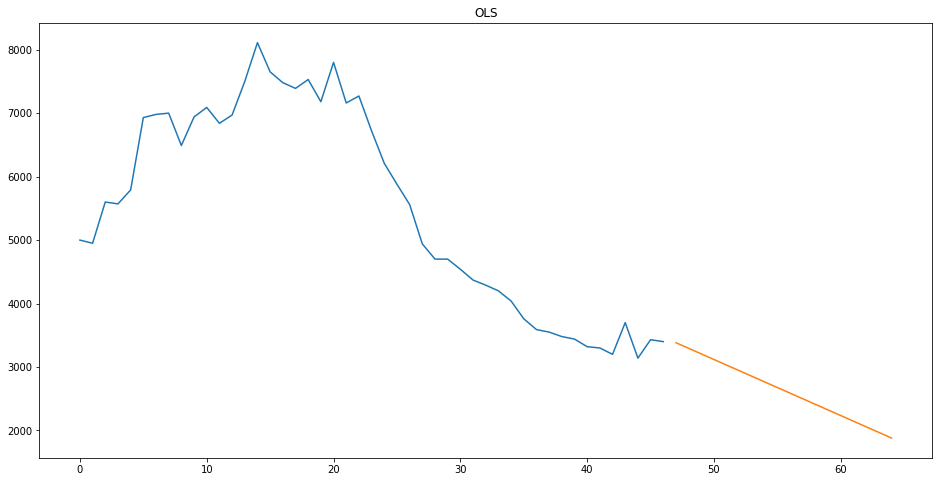

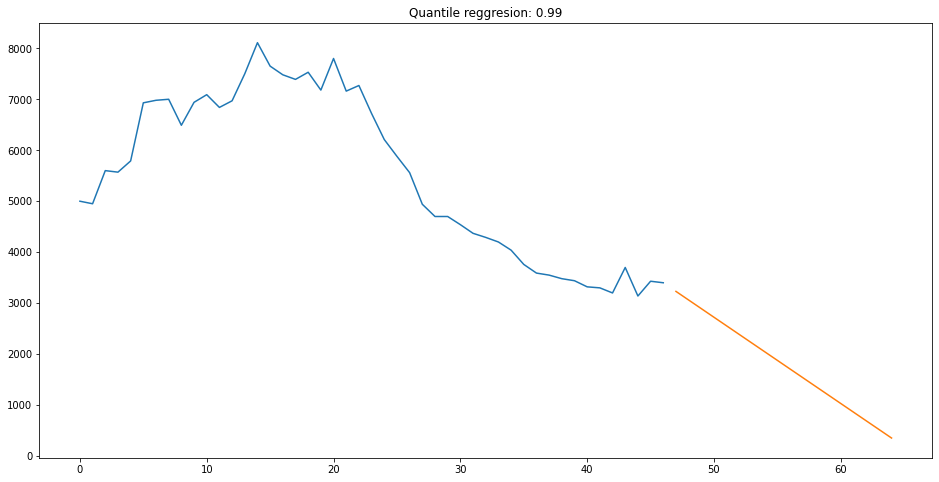

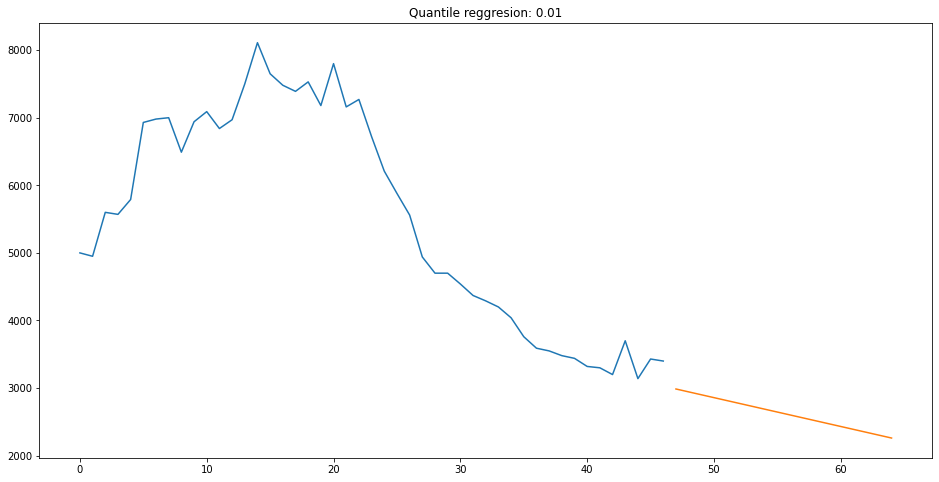

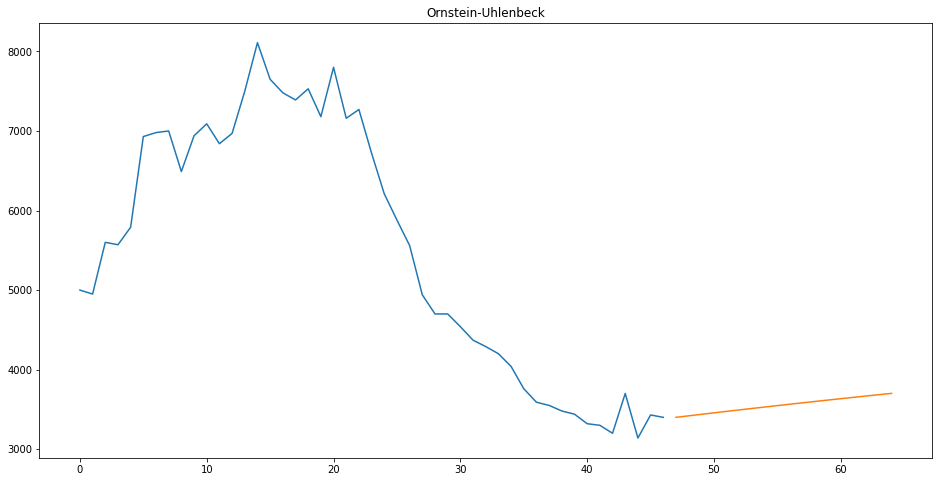

[5000. 4950. 5600. 5570. 5790. 6930. 6980. 7000. 6490. 6940. 7090. 6840.
 6970. 7500. 8110. 7650. 7480. 7390. 7530. 7180. 7800. 7160. 7270. 6720.
 6210. 5880. 5560. 4940. 4700. 4700. 4540. 4370. 4290. 4200. 4040. 3760.
 3590. 3550. 3480. 3440. 3320. 3300. 3200. 3700. 3140. 3430. 3400.]


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend    -11.13     13.43     -9.49    -32.66     11.71      7.05      2.04
       init_s[0]    -19.54     34.02    -19.22    -76.67     32.58      9.37      1.04
       init_s[1]    -48.42     24.37    -51.19    -75.30      4.95     14.54      1.21
       init_s[2]    -18.74     48.94    -24.64    -76.09     87.99      4.17      2.36
       init_s[3]     -2.49     21.71     -1.32    -43.03     29.47      5.06      1.61
       init_s[4]      0.22     27.73      5.27    -44.29     34.84      3.93      1.82
       init_s[5]    -11.07     51.14      3.19   -111.77     46.88      5.27      2.36
       init_s[6]     -0.53     31.43      4.56    -59.84     35.97      5.83      1.43
       init_s[7]     -5.72     47.83    -19.58    -72.54     92.50      4.15      2.16
       init_s[8]    -15.39     45.00    -16.23    -93.71     50.91      7.90      2.57
       init_s[9]     -1.57     23.62     -

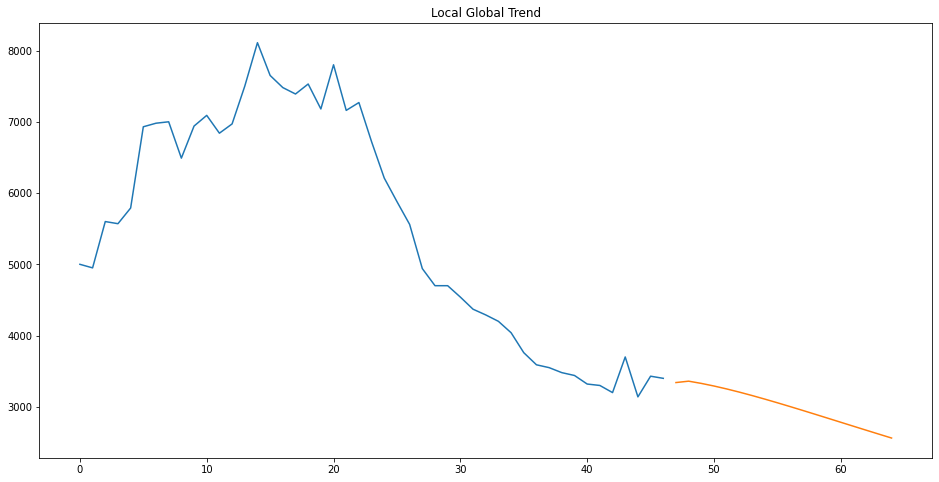

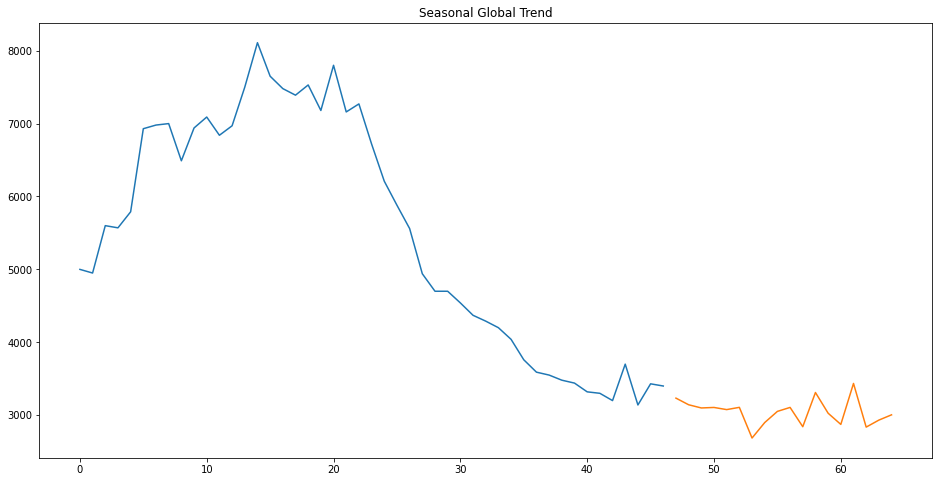

In [ ]:
visualise(one_time_series, ols_prediction(one_time_series, meta_variables), title="OLS")
visualise(one_time_series, quant_reg_prediction(one_time_series, meta_variables, q=.99), title=f"Quantile reggresion: {.99}")
visualise(one_time_series, quant_reg_prediction(one_time_series, meta_variables, q=.01), title=f"Quantile reggresion: {.01}")
visualise(one_time_series, ornstein_uhlenbeck_prediction(one_time_series, meta_variables), title=f"Ornstein-Uhlenbeck")


series_string = str(one_time_series)
print(one_time_series)
time_series = []
for val in series_string[1:-1].split(" "):
    try:
        float(val)
        val = val.strip()
        time_series.append(val)
    except:
        continue
time_series = np.array(time_series, dtype=np.float64)

predic = sgt_prediction(time_series, meta_var)

visualise(one_time_series, lgt_prediction(one_time_series, meta_variables), title=f"Local Global Trend")

visualise(one_time_series, predic, title=f"Seasonal Global Trend")

#Test

In [ ]:
print(one_time_series)
print(meta_variables)

[5000. 4950. 5600. 5570. 5790. 6930. 6980. 7000. 6490. 6940. 7090. 6840.
 6970. 7500. 8110. 7650. 7480. 7390. 7530. 7180. 7800. 7160. 7270. 6720.
 6210. 5880. 5560. 4940. 4700. 4700. 4540. 4370. 4290. 4200. 4040. 3760.
 3590. 3550. 3480. 3440. 3320. 3300. 3200. 3700. 3140. 3430. 3400.]
{'h': 18, 's': 12, 'f': 'M'}


In [ ]:
for i, el in enumerate(one_time_series):
    #print(type(time_series[i]))
    #print(type(el))
    if el != time_series[i]:
        print("one_time_series: ", el)
        print("time_series: ", time_series[i])

In [ ]:
sgt_prediction(one_time_series, meta_variables)

In [ ]:
test = True

if test:
    meta_var1  = {'h': 8, 's': 4, 'f': '4M'}
    meta_var2 = {'h': 6, 's': 1, 'f': 'M'}
    meta_var3 = {'h': 18, 's': 12, 'f': '4M'}
    meta_var4 = {'h': 8, 's': 4, 'f': 'Y'}
    meta_var5 = {'h': 18, 's': 12, 'f': 'M'}
    
    series_string1 = """[8700.0 8700.0 8600.0 8600.0 8700.0 8800.0 8800.0 8800.0 8900.0 9000.0 9100.0 9000.0 9200.0 9200.0 9000.0 8900.0 8900.0 8900.0 8800.0 8700.0 8700.0 8600.0 8700.0 8600.0 8500.0 8500.0 8500.0 8400.0 8500.0 8500.0 8600.0 8600.0 8700.0 8600.0 8500.0 8500.0 8500.0 8600.0 8500.0 8600.0 8800.0 9000.0 9000.0 9200.0 9400.0 9100.0 8900.0 8900.0 8900.0 8900.0 9000.0 9000.0 9000.0 9300.0 9500.0 9500.0 9600.0 9600.0]"""
    series_string2 = """[139.0 120.0 179.0 405.0 445.0 468.0 506.0 447.0 460.0 409.0 369.0 371.0 390.0 448.0 724.0 412.0 399.0 371.0 375.0 364.0 367.0 387.0 665.0 450.0 412.0 378.0 730.0 745.0 732.0 467.0 493.0 509.0 481.0 499.0 470.0 482.0 451.0 454.0 519.0 594.0 580.0 655.0 672.0 681.0 679.0 687.0 799.0]"""
    series_string3 = """[3443. 3467. 3476. 3494. 3502. 3515. 3544. 3597. 3709. 3851. 3957. 4067. 4202. 4310. 4333. 4250. 4161. 4079. 3940. 3758. 3584. 3400. 3237. 3116. 3054. 3069. 3128. 3212. 3312. 3454. 3613. 3756. 3845. 3941. 4122. 4370. 4589. 4673. 4551. 4311. 4121. 4038. 3988. 3918. 3843. 3835. 3858. 3800. 3696. 3589. 3552. 3677. 3896. 4117. 4242. 4191. 3313. 3384. 3595. 3838. 3910. 3823. 3645. 3502. 3486. 3574. 3713. 3842. 3881. 3828. 3715. 3661. 3710. 3811. 3861. 3831. 3802. 3775. 3732. 4279. 4243. 4294. 4402. 4442. 4423. 4403. 4416. 4463. 4538. 4640. 4744. 4826. 4854. 4742. 4598. 4524. 4526. 4575. 4597. 4593. 4592. 4536. 4459. 4351. 4244. 4158.]"""
    series_string4 = """[1354.44995117 1482.43005371 1582.91003418 1477.76000977 1516.43994141 1751.38000488 1955.66003418 2242.72998047 2498.62988281 2234.58007812 2001.83996582 2102.05004883 2472.30004883 2443.94995117 2720.25 3150.64990234 3331.93994141 2955.07006836 2736.95996094 2905.75 3021.33007812 2976.56005859 3070.30004883 3018.2800293  2976.44995117 3220.25       3253.58007812 3373.81005859 3392.9699707 ]"""
    series_string5 = """[5000. 4950. 5600. 5570. 5790. 6930. 6980. 7000. 6490. 6940. 7090. 6840. 6970. 7500. 8110. 7650. 7480. 7390. 7530. 7180. 7800. 7160. 7270. 6720. 6210. 5880. 5560. 4940. 4700. 4700. 4540. 4370. 4290. 4200. 4040. 3760. 3590. 3550. 3480. 3440. 3320. 3300. 3200. 3700. 3140. 3430. 3400.]""" 


    series_string = series_string5
    meta_var = meta_var5
    time_series = []
    for val in series_string[1:-1].split(" "):
        try:
            float(val)
            val = val.strip()
            time_series.append(val)
        except:
            continue
    time_series = np.array(time_series, dtype=np.float64)
    print(time_series) 
    print(np.array(time_series).dtype)
    print(type(np.array(time_series)))
    predic = sgt_prediction(time_series, meta_var)
  

In [ ]:
predic

DeviceArray([3233.8223, 3142.8372, 3098.9717, 3105.8167, 3076.4207,
             3107.2556, 2686.3591, 2898.8853, 3051.9402, 3106.279 ,
             2841.773 , 3310.7969, 3026.6528, 2873.1716, 3435.1873,
             2836.3333, 2932.3206, 3004.7263], dtype=float32)